<a href="https://colab.research.google.com/github/xgross11/UPA2_projekt/blob/main/explor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno

penguins = pd.read_csv("penguins_lter.csv")

--- prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [116]:
print("Jmena sloupcu a jejich typy:\n")
print(penguins.info())

print("\n----------------------------------------\nCharakteristika ciselnych atributu:\n")
print(penguins.describe())

print("\n----------------------------------------\nCharakteristika kategorickych atributu:\n")
include = ['object']
print(penguins.describe(include = include))

print("\n----------------------------------------\nVypis zastoupeni jednotl. hodnot kategorickych atributu")
print("studyName")
print(penguins['studyName'].value_counts())
print("\nSpecies")
print(penguins['Species'].value_counts())
print("\nRegion")
print(penguins['Region'].value_counts())
print("\nIsland")
print(penguins['Island'].value_counts())
print("\nStage")
print(penguins['Stage'].value_counts())
print("\nIndividual ID")
print(penguins['Individual ID'].value_counts())
print("\nClutch Completion")
print(penguins['Clutch Completion'].value_counts())
print("\nDate Egg")
print(penguins['Date Egg'].value_counts())
print("\nSex")
print(penguins['Sex'].value_counts())
print("\nComments")
print(penguins['Comments'].value_counts())

#'''Vypis procentualniho zastoupeni jednotl. hodnot kategorickych atributu'''

#print(penguins['workclass'].value_counts(normalize=True))
#print(penguins['workclass'].value_counts(normalize=True).mul(100).round(1))
#print(penguins['workclass'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

Jmena sloupcu a jejich typy:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C

--- prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

Grafy ciselnych atributu



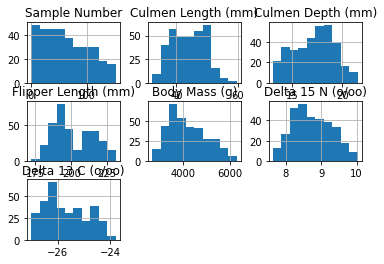

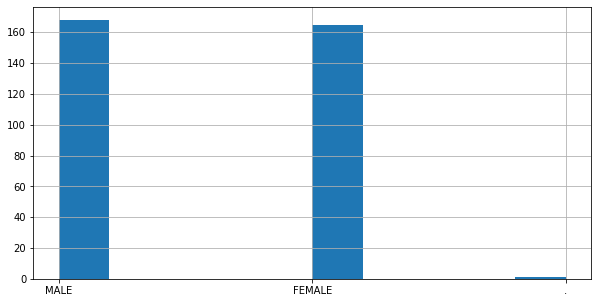


----------------------------------------
Grafy kategorickych atributu



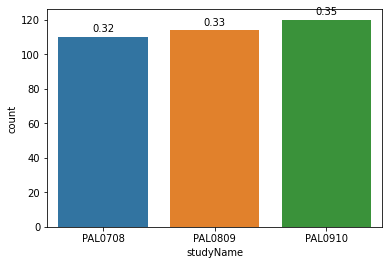

In [78]:
#TODO doplnit grafy-kombinace atributu, nevim si rady jak je nakombinovat do cca 5 grafu
#pro ciselne krabicove nebo histogram
print("Grafy ciselnych atributu\n")
penguins.hist()
plt.show()

penguins.Sex.hist(figsize=(10,5))
plt.show()

print("\n----------------------------------------\nGrafy kategorickych atributu\n")
ax = sns.countplot(x = 'studyName',data = penguins)
total = float(len(penguins))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

--- zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [132]:
fig = make_subplots(rows = 4, cols = 3)
row_no = col_no = 1

for col in penguins.columns:
    if(penguins[col].dtype != "O" and penguins[col].dtype != penguins['Date Egg'].dtype):
        fig.add_trace(
            go.Box(y=penguins[col], name = col),
            row = row_no,
            col = col_no,
        )
        col_no += 1
    if col_no % 4 == 0: # necessary calculations for correctly presenting subplots
        row_no = row_no + 1
        col_no = 1
fig.update_layout(title_text = "Detekce odlehlych hodnot pomoci boxplotu")
fig.show()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Box(y=penguins["Comments"], name = "Comments")
)
fig.show()

--- proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

Celkovy pocet chybejicich hodnot

363

----------------------------------------
Pocet chybejicich hodnot pro jednotlive atributy

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

----------------------------------------
Procentuelni zastoupeni nulovych hodnot

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)

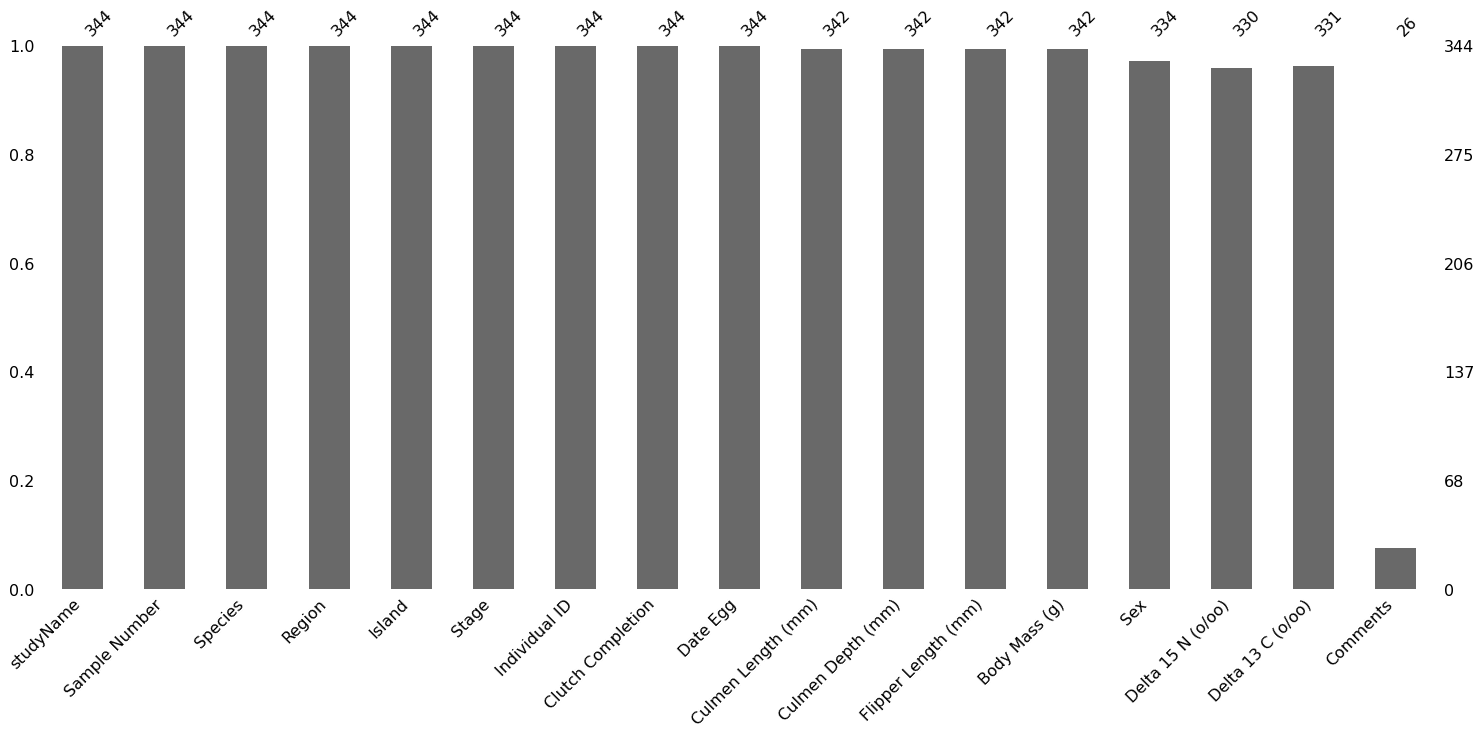

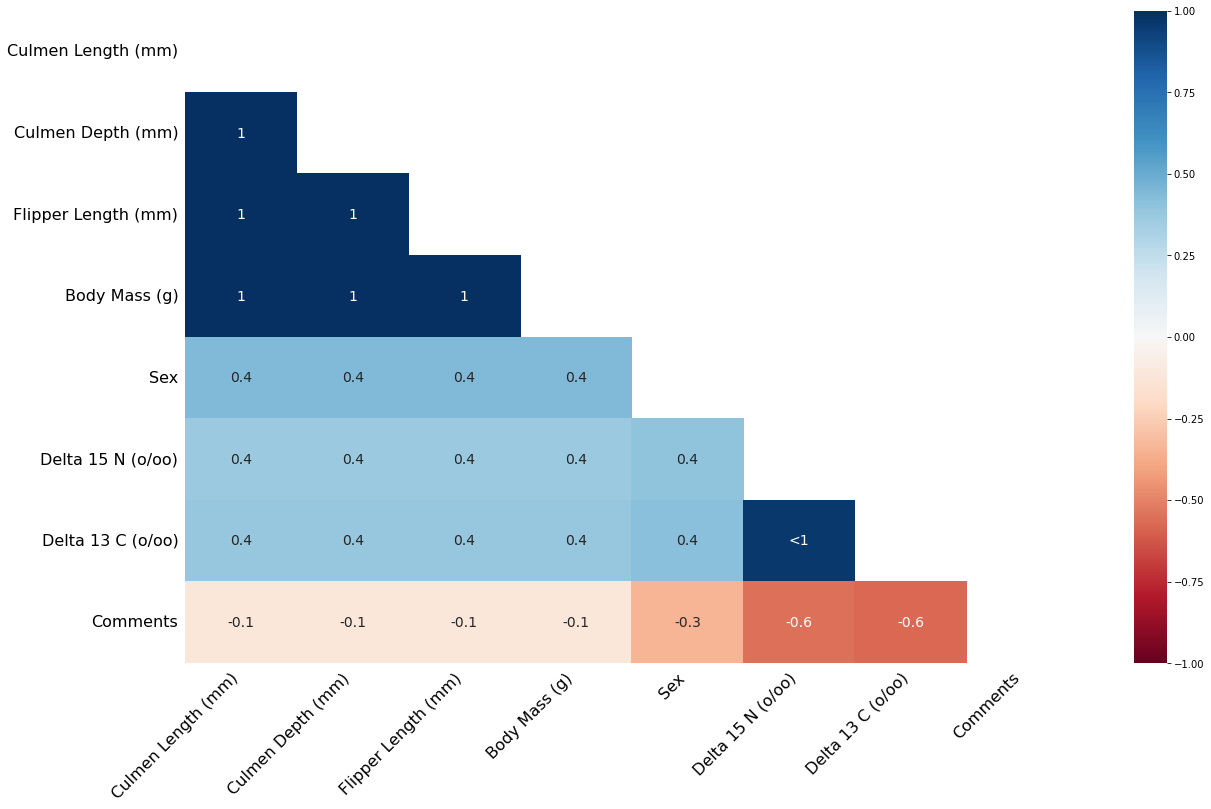

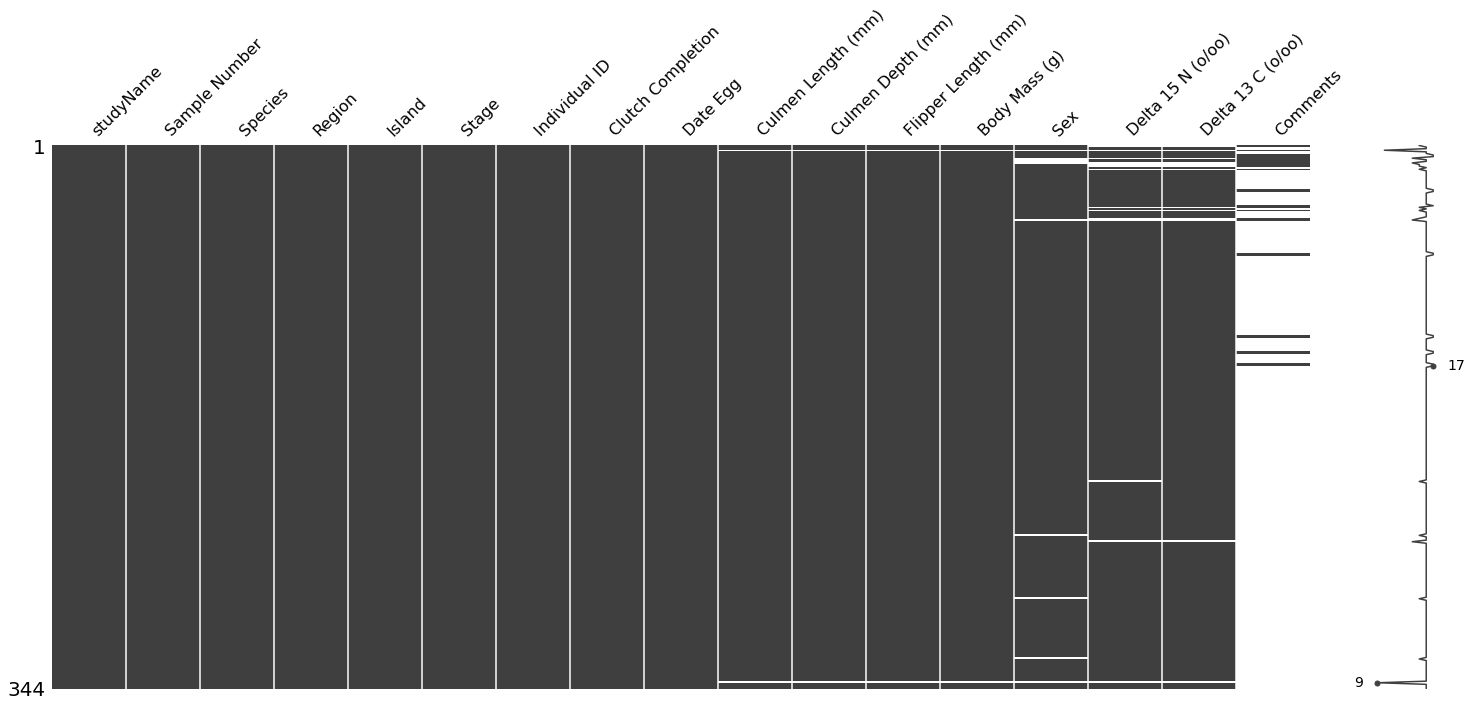

In [114]:
print("Celkovy pocet chybejicich hodnot\n")
print(penguins.isnull().sum().sum())

print("\n----------------------------------------\nPocet chybejicich hodnot pro jednotlive atributy\n")
print(penguins.isnull().sum())

print("\n----------------------------------------\nProcentuelni zastoupeni nulovych hodnot\n")
print(penguins.isnull().sum() * 100 / penguins.shape[0]) 

msno.bar(penguins)
plt.show()
msno.heatmap(penguins)
plt.show()
msno.matrix(penguins)
plt.show()


--- proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

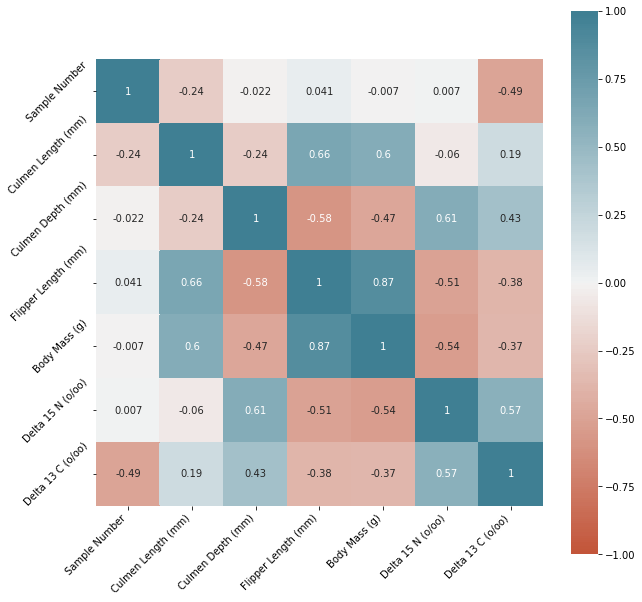

In [115]:
plt.figure(figsize=(10,10))
corr = penguins.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,

);

plt.show()

# 2. část

###První varianta datové sady

### Druhá varianta datové sady